In [4]:
library(anndata)
library(ggplot2)
library(ggsignif)
library(ggpubr)
library(ggthemes)
library(colorspace)
library(ggrastr)

In [2]:
# Load CytoTRACE results object
cyto_results = readRDS("results/cyto_results.rds")

In [5]:
# Load fibroblast data
adata = read_h5ad('../data/rna/scRNA_batch1_2.processed.fibroblasts.h5ad')

In [6]:
tab10 = c(
    "#1f77b4",  # blue
    "#ff7f0e",  # orange
    "#2ca02c",  # green
    "#d62728",  # red
    "#8c564b",  # brown
    "#e377c2",  # pink
    "#7f7f7f",  # grey
    "#bcbd22",  # yellow
    "#17becf",  # turquoise
    "#9467bd"  # purple

)

In [7]:
tab = data.frame(annot1=adata$obs$annot1, CytoTRACE=cyto_results$CytoTRACE,
                 UMAP1=adata$obsm$X_umap[, 1], UMAP2=adata$obsm$X_umap[, 2])

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


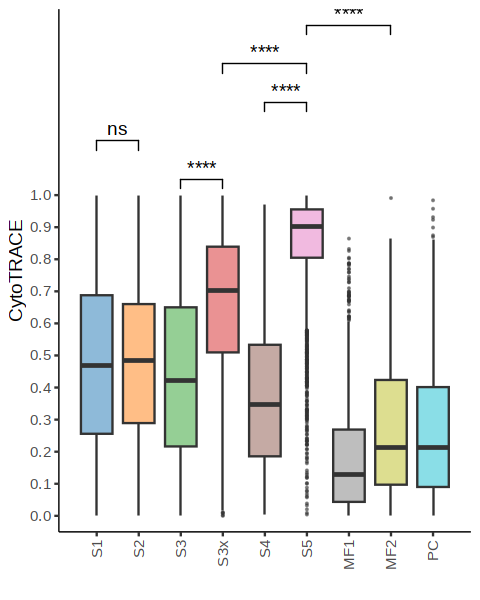

In [8]:
width = 4.0
height = 5

comparisons = list(
    c("S3", "S3x"),
    c("S1", "S2"),
    
    # S5 group comparisons
    c("S4", "S5"),
    c("S3x", "S5"),
    #c("S1", "S5"),
    #c("S2", "S5"),
    #c("S3", "S5")
    c("S5", "MF2")

)

options(repr.plot.width = width, repr.plot.height = height)
ggplot(tab, aes(x=annot1, y=CytoTRACE, fill=annot1)) +
    geom_boxplot(outlier.size=0.1,
                 alpha=0.5
    ) +
    #geom_signif(comparisons=comparisons, map_signif_level=TRUE) +
    stat_compare_means(comparisons = comparisons,
        method="t.test",
        # significance symbols
        symnum.args = list(cutpoints = c(0, 0.0001, 0.001, 0.01, 0.05, Inf), symbols = c("****", "***", "**", "*", "ns"))
    ) +
    scale_y_continuous(breaks=seq(0, 1, 0.1), expand=expansion(add=0.05)) + 
    scale_x_discrete(expand = expansion(add=0.9), guide = guide_axis(angle = 90)) +
    #scale_color_manual(values=lighten(tab10, 0.5)) +
    #scale_fill_manual(values=lighten(tab10, 0.5, space="HLS")) +
    #scale_fill_manual(values=lighten(tab10, 0.5, space="HLS")) +
    scale_fill_manual(values=tab10) +


    xlab("") +
    theme_classic() +
    #theme_light() +
    #theme_linedraw() +
    theme(legend.position="none") +  # no legend
    theme(axis.line.x = element_line(size = 0.3), axis.line.y = element_line(size = 0.3))  #  thinner axis lines

ggsave("plots/cytotrace_boxplot.pdf", width = width, height=height)

In [9]:
adata

AnnData object with n_obs × n_vars = 26727 × 17590
    obs: 'doublet_bh_pval', 'n_counts', 'sample_id', 'scrublet_score', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'annot_batch1_lr', 'annot_batch1_lr_prob', 'annot_batch2_lr', 'annot_batch2_lr_prob', 'leiden_bk_r0_1', 'leiden_bk_r0_3', 'leiden_bk_r0_5', 'is_doublet', 'leiden_bk_split1', 'leiden_bk_split2', 'leiden_bk_split3', 'annot1', 'leiden_bk_split4', 'annot_gut_lr', 'annot_gut_lr_prob', 'broad_annot1'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'cc', 'highly_variable', 'highly_variable_nbatches', 'hvg_full'
    uns: 'annot1_colors', 'leiden', 'neighbors', 'neighbors_bk', 'pca', 'umap'
    obsm: 'X_pca'

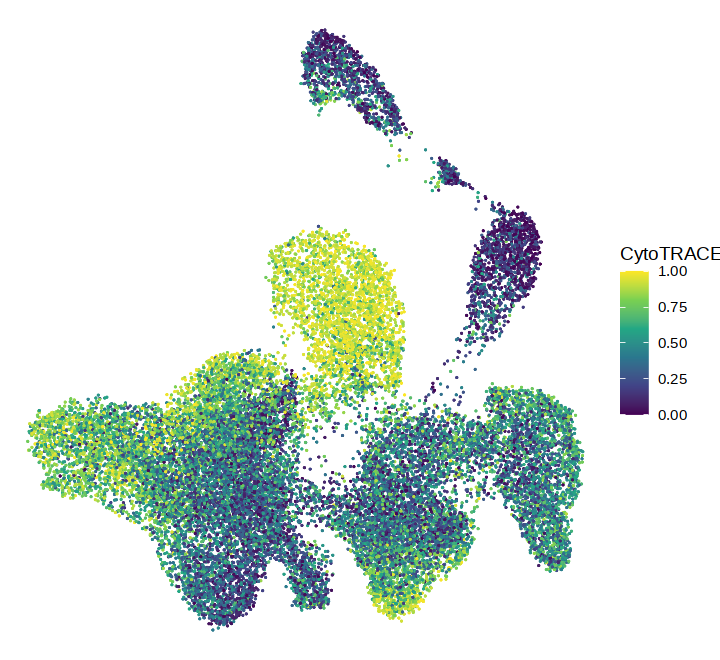

In [16]:
width = 6.0
height = 5.5

options(repr.plot.width = width, repr.plot.height = height)

ggplot(tab, aes(x=UMAP1, y=UMAP2, col=CytoTRACE)) +
    geom_point_rast(pch=16, size=0.5) +
    scale_color_viridis_c() +
    theme_void()

ggsave("plots/cytotrace_umap.pdf", width = width, height=height)

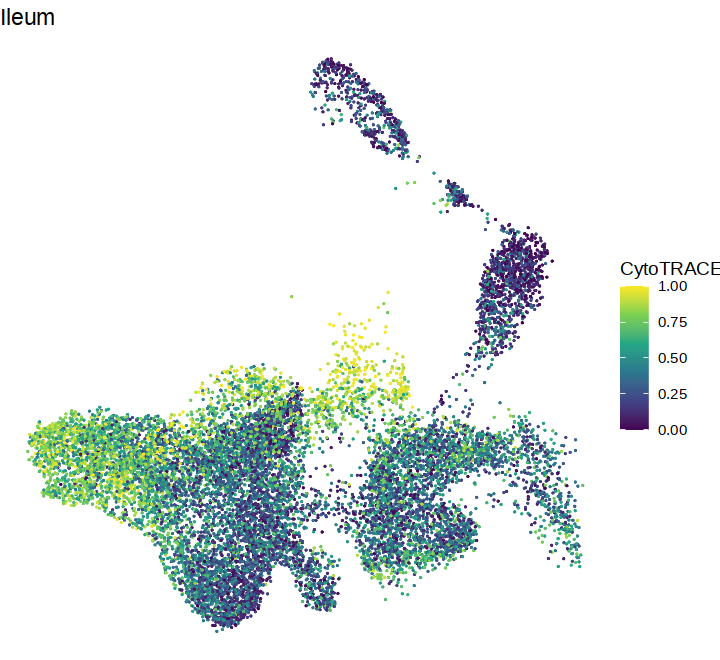

In [17]:
# Same as aboce but showing only 

width = 6.0
height = 5.5

options(repr.plot.width = width, repr.plot.height = height)

tab_sub = tab[adata$obs$site_taken_fine == 'ileum', ]
ggplot(tab_sub, aes(x=UMAP1, y=UMAP2, col=CytoTRACE)) +
    geom_point_rast(pch=16, size=0.5) +
    scale_color_viridis_c() +
    ggtitle("Ileum") +
    theme_void()

ggsave("plots/cytotrace_umap_ileum.pdf", width = width, height=height)